# Pytorch Classifier Example  
## Preparation  
If you have NVIDIA GPU installed in your machine and want to use it for training, install NVIDIA CUDA (recommended version 10.1) and the GPU driver (which comes as a package with CUDA):
- head to [NVIDIA CUDA download page](https://developer.nvidia.com/cuda-10.1-download-archive-base).
- choose your operating system, architecture, distribution, OS version, then choose "deb (local)" (recommended if you don't know what you are doing).
- then download from the "Base Intaller" section.
- the installation steps is provided in the section.

To install the dependencies for this project, execute:
```
pip install -r requirements.txt
```
Make sure you have `pip` package installed on your system, otherwise follow this [installation steps](https://pip.pypa.io/en/stable/installing/).

## Training Model

In [1]:
import train

data_path = "dataset/hymenoptera" # change this if you have different dataset path
train.main(arch='resnet18', data_path=data_path, epochs=25)

preparing 'resnet18' model with 2 class: ['ants', 'bees']
Training resnet18 on cuda:0
you can also check progress on tensorboard, execute in terminal:
  > tensorboard --logdir result/<model_name>/tb/



Best Acc: 0.960784
best trained model is saved to: result/resnet18/resnet18_best.pth


## Visualise Training Result

### Running the classifier
make sure to change the `pretrained_path` to your pretrained model and the `input_image` path to your needs. 

In [2]:
%matplotlib inline
from classify import Classifier

pretrained_path = "result/resnet18/resnet18_best.pth" # change this to your pretrained model's path
input_image = ["data/ants.jpg", "data/bee.jpg"]

model = Classifier(pretrained_path)
output = model(input_image)
print(output)

['ants', 'bees']


### Visualise classifier output

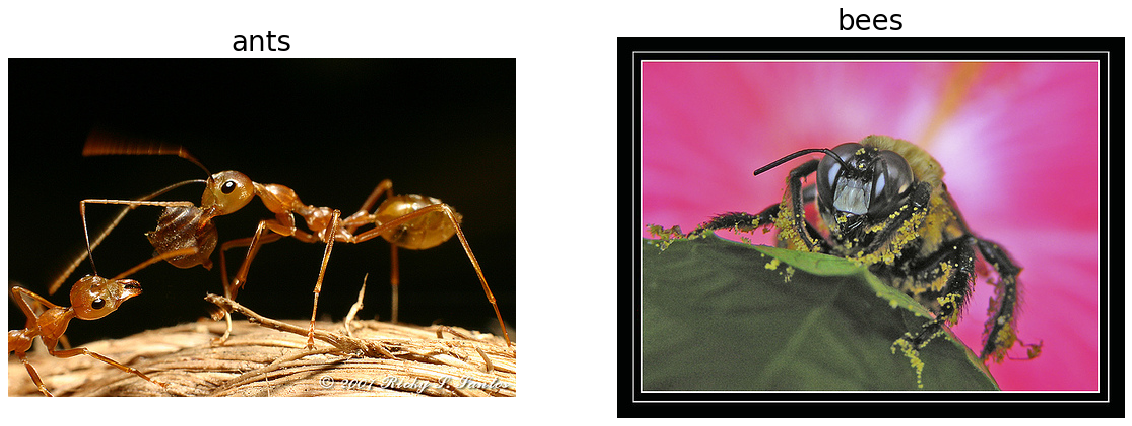

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(18, 16), dpi= 80, edgecolor='k')
for idx, (img_path, cls) in enumerate(zip(input_image, output)):
    img = np.asarray(Image.open(img_path), dtype=np.float32) / 255

    ax = plt.subplot(1, 2, idx+1)
    ax.axis('off')
    ax.set_title(cls, fontdict={'fontsize': 25})
    ax.imshow(img)
plt.show()